In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics

import time

In [2]:
column_names = list(range(1,62))
pd.options.display.float_format = '{:,.4f}'.format

df = pd.read_csv("sonar.all-data", names = column_names, on_bad_lines='skip') 
df = df.rename({61: 'Correct classification'}, axis='columns')
df

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Correct classification
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
#find number of null entries to see if there is a need to clean the dataset
df.isnull().sum()

1                         0
2                         0
3                         0
4                         0
5                         0
                         ..
57                        0
58                        0
59                        0
60                        0
Correct classification    0
Length: 61, dtype: int64

In [4]:
df2 = df.iloc[: , -1:]
df2 = df2['Correct classification']
df2

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: Correct classification, Length: 208, dtype: object

In [5]:
df = df.drop(columns = df.columns[-1])
df

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [6]:
df.nunique()

1     177
2     182
3     190
4     181
5     193
6     196
7     195
8     201
9     205
10    207
11    203
12    206
13    198
14    202
15    203
16    203
17    202
18    204
19    206
20    203
21    200
22    203
23    199
24    201
25    198
26    194
27    190
28    194
29    197
30    202
31    207
32    205
33    205
34    206
35    205
36    205
37    206
38    206
39    204
40    206
41    204
42    208
43    205
44    196
45    205
46    199
47    202
48    204
49    193
50    154
51    160
52    144
53    134
54    134
55    129
56    122
57    121
58    124
59    119
60    109
dtype: int64

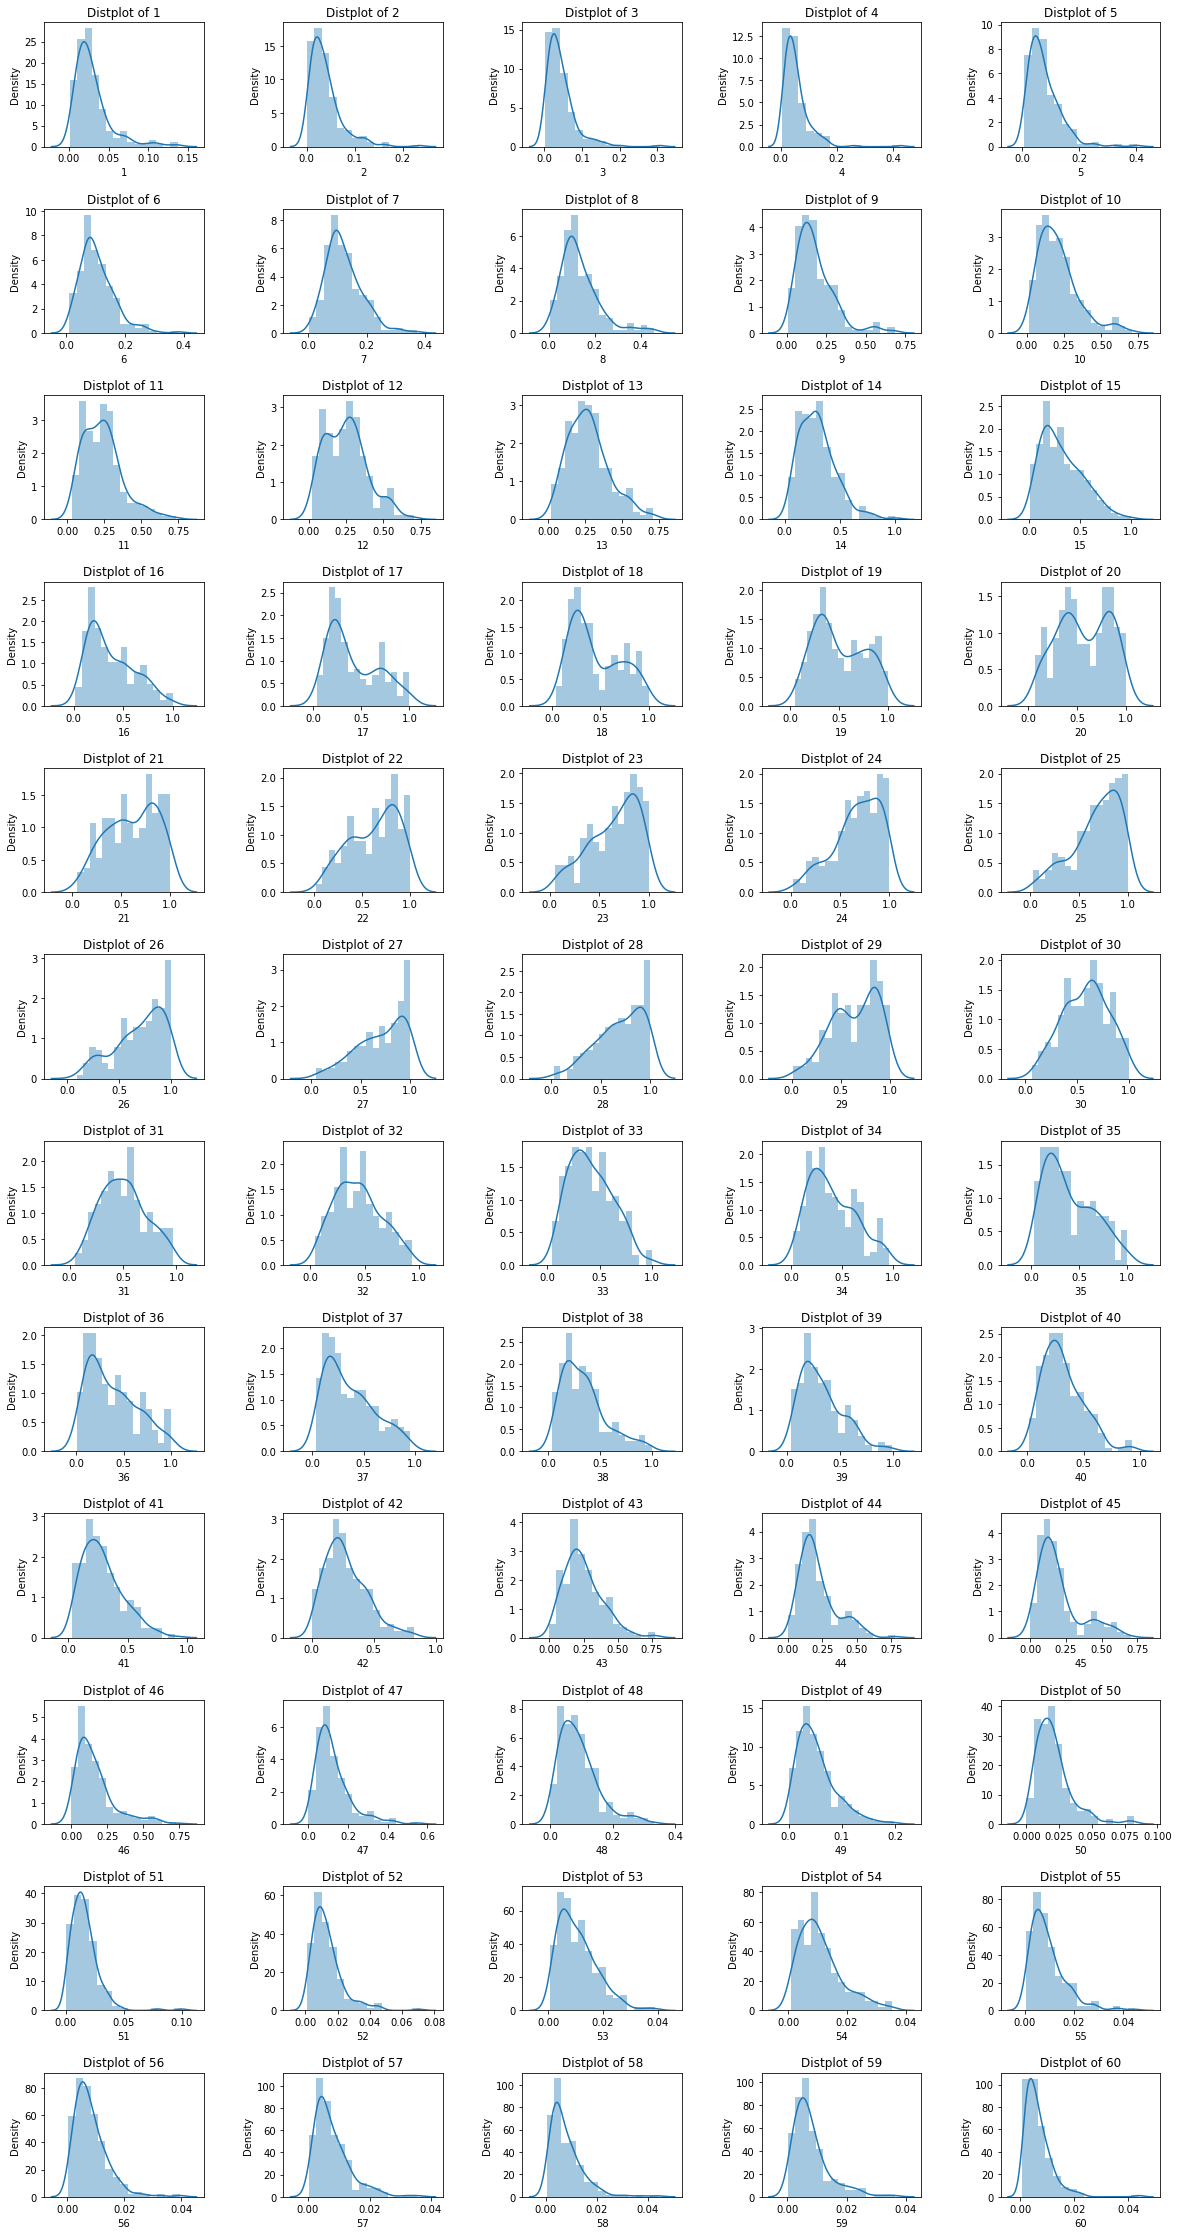

In [7]:
plt.figure(1 , figsize = (20 , 40))
n = 0 
for x in column_names:
    try:
        n += 1
        plt.subplot(12 , 5 , n)
        plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
        sns.distplot(df[x] , bins = 15)
        plt.title('Distplot of {}'.format(x))
    except:
        pass
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,-0.3996,-0.0406,-0.0269,-0.7151,0.3645,-0.1013,0.5216,0.2978,1.1253,0.0212,...,0.5953,-1.1154,-0.5976,0.6809,-0.2956,1.4816,1.7638,0.0699,0.1717,-0.6589
1,0.7035,0.4216,1.0556,0.3233,0.7777,2.6072,1.5226,2.5110,1.3183,0.5887,...,-0.2979,-0.5223,-0.2569,-0.8432,0.0155,1.9010,1.0707,-0.4724,-0.4446,-0.4199
2,-0.1292,0.6011,1.7234,1.1722,0.4005,2.0933,1.9688,2.8524,3.2328,3.0661,...,-1.0659,1.0176,0.8364,-0.1978,1.2318,2.8272,4.1202,1.3094,0.2528,0.2576
3,-0.8356,-0.6489,0.4817,-0.7194,-0.9871,-1.1494,-0.1938,-0.0847,-1.0009,-0.6105,...,0.6704,-0.1374,-1.0093,0.5573,-0.1118,-0.1611,-0.4886,-0.5499,-0.6392,1.0346
4,2.0508,0.8565,0.1113,-0.3122,-0.2924,-0.6728,-0.0137,1.3173,1.5105,1.7722,...,-0.0391,-1.0738,-0.7538,-0.0605,0.2418,-1.1746,-0.1075,-0.4879,0.4474,0.5764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.4562,-0.1167,-0.7051,-0.7797,-0.6478,0.9910,1.3150,0.4073,0.4640,0.4485,...,0.3532,-0.1894,-0.1291,1.2301,-0.8472,0.3283,-0.2287,0.5502,1.8420,1.8316
204,0.1367,-0.8618,-0.3660,0.0540,0.0144,-0.1487,-0.3690,-0.3885,-0.6351,0.0533,...,-0.9156,-0.7617,-0.2001,0.3514,-0.4229,-0.3358,-0.7659,-0.7358,-0.2824,0.0384
205,1.0044,0.1601,-0.6738,-0.5320,-0.7236,0.2125,0.0641,-0.2001,-0.4420,0.3329,...,-0.0475,0.2684,-1.1087,-0.8020,-0.4371,0.1185,1.0707,0.9065,-0.0391,-0.6789
206,0.0495,-0.0954,0.1348,0.1488,-1.0556,0.5229,0.4016,-0.2649,0.1397,0.2024,...,-0.9907,-0.5015,-0.8674,0.2278,-0.8048,-0.8251,-0.7659,-0.0076,-0.7040,-0.3402


In [9]:
# import PCA
from sklearn.decomposition import PCA 
# Applying PCA to visualize data
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_features_df)
pca_data

array([[ 1.92116817, -1.37089312],
       [-0.48012458,  7.58638801],
       [ 3.8592282 ,  6.43986016],
       [ 4.59741943, -3.10408888],
       [-0.53386761,  1.84984701],
       [-1.24701593,  3.78548414],
       [ 1.87007312,  2.49551038],
       [-2.05769816,  2.3147504 ],
       [-1.64556277,  0.25372155],
       [-4.28065736, -2.42781795],
       [-1.46164351, -6.32305562],
       [-2.46394888, -1.2537634 ],
       [-3.99546982,  1.64506244],
       [ 0.6370814 , -0.63741683],
       [-0.10539302, -0.25210417],
       [ 2.11242307,  0.59393523],
       [ 4.39574903, -2.25749069],
       [ 1.43859617,  1.90219042],
       [-1.03943408, -3.29436397],
       [-1.16485881,  8.59655069],
       [ 2.64812566,  1.66803742],
       [ 6.23535677, -1.47389049],
       [11.23389579, -2.75609298],
       [-0.24732176, -4.86351661],
       [ 2.65154822, -4.39934635],
       [-0.42203896, -7.16826626],
       [-3.69919995,  2.49392786],
       [-2.90589296,  0.16356259],
       [-1.8957691 ,

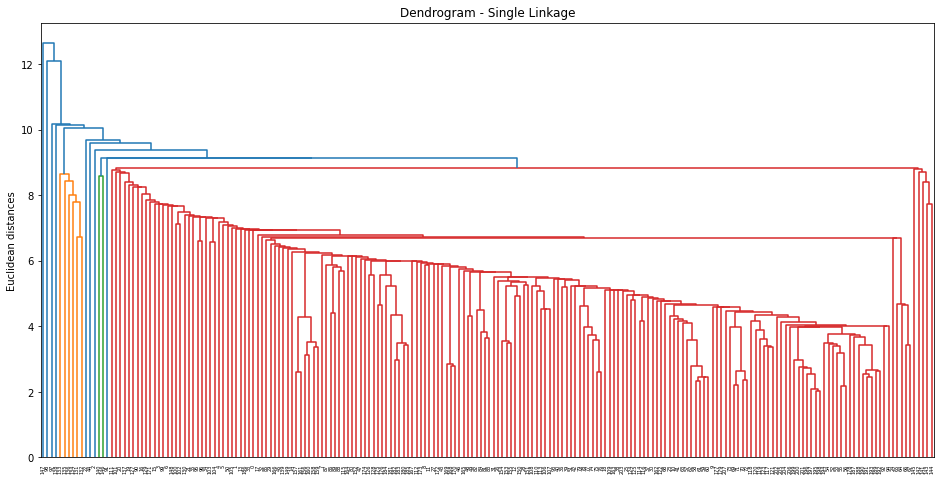

In [10]:
#Agglomerative clustering using single linkage method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "single"))

plt.title('Dendrogram - Single Linkage')
plt.ylabel('Euclidean distances')
plt.show()

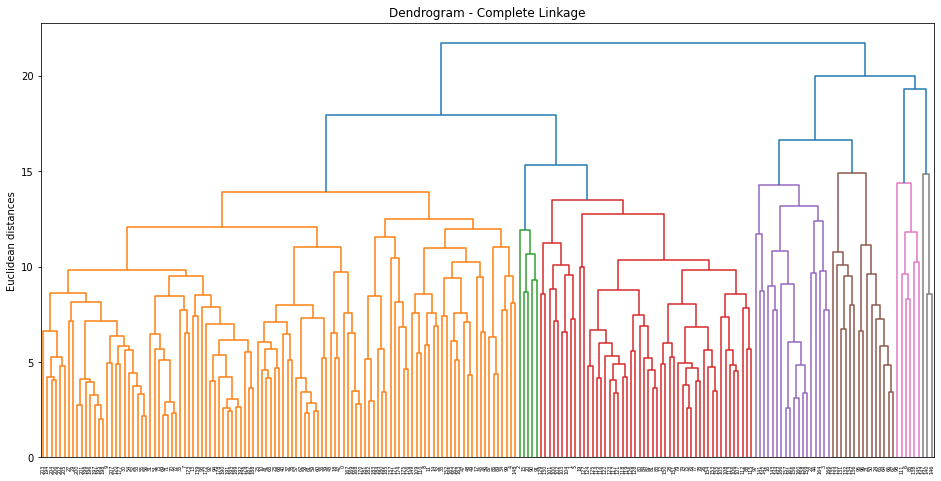

In [11]:
#Agglomerative clustering using complete linkage method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "complete"))

plt.title('Dendrogram - Complete Linkage')
plt.ylabel('Euclidean distances')
plt.show()

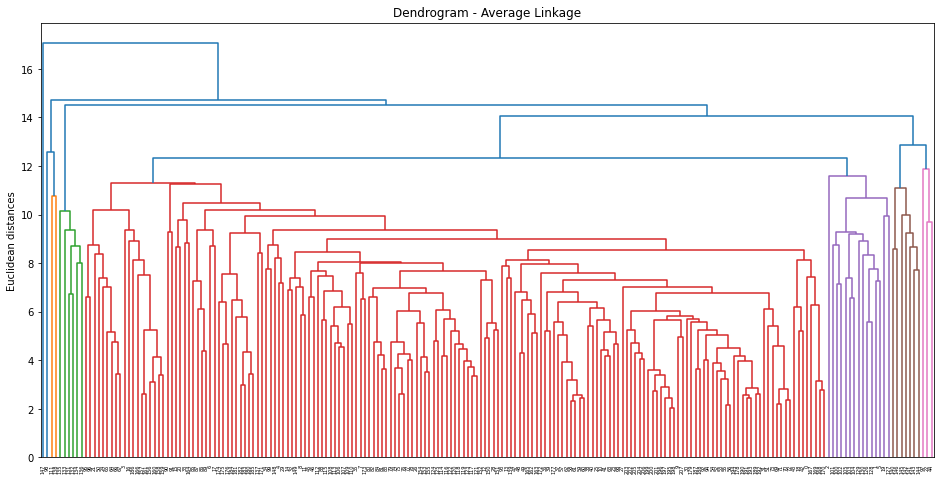

In [12]:
#Agglomerative clustering using average method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "average"))

plt.title('Dendrogram - Average Linkage')
plt.ylabel('Euclidean distances')
plt.show()

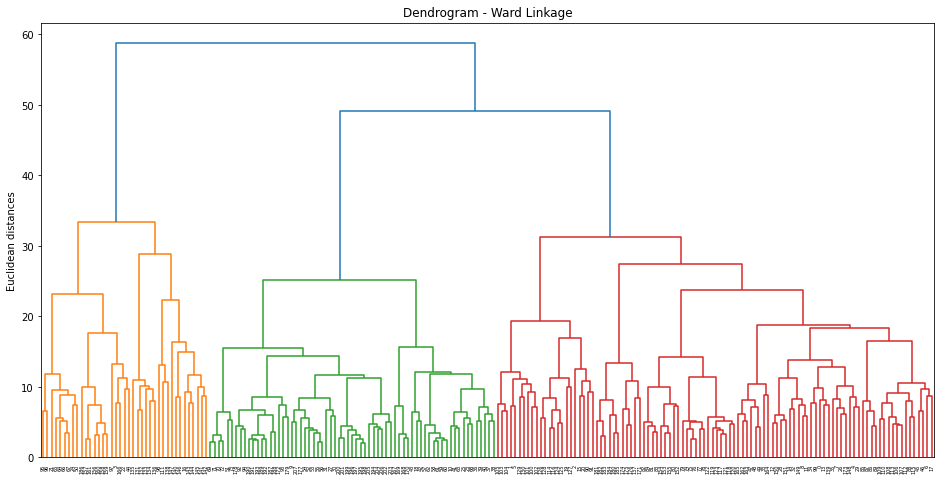

In [13]:
#Agglomerative clustering using ward method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "ward"))

plt.title('Dendrogram - Ward Linkage')
plt.ylabel('Euclidean distances')
plt.show()

In [14]:
def classification_accuracy(train_data, predicted_clusters, test_data):
    actual_labels = test_data.value_counts().index.tolist()
    train_data['predicted_clusters'] = predicted_clusters
    cluster_labels = pd.value_counts(pd.Series(predicted_clusters))
    cluster_labels = np.stack([cluster_labels.keys().values, cluster_labels.values]).T
    cluster_labels = cluster_labels.tolist()
    for i in range(len(cluster_labels)):
        cluster_labels[i].append(actual_labels[i])
    cluster_labels.sort()
    train_data['predicted_labels'] = list(map(lambda x : cluster_labels[x][2], train_data['predicted_clusters']))
    sum(train_data['predicted_labels']==test_data)
    accuracy = sum(train_data['predicted_labels']==test_data)/len(train_data)
    print("Classification accuracy: ", accuracy)

In [15]:
#Single-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='single')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run single-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

classification_accuracy(train_df, y_hc, df2)

Time taken to run single-linkage agglo. clustering (pre-PCA dataset):  0.010968685150146484
Silhouette score is:  0.37430574481571216
Davies Bouldin score is:  0.4839940218380188
Calinski Harabasz score is:  3.9130590798977845
Classification accuracy:  0.5288461538461539


Time taken to run single-linkage agglo. clustering (post-PCA dataset):  0.002991914749145508
Silhouette score is:  0.4550285293979195
Davies Bouldin score is:  0.36451686819503465
Calinski Harabasz score is:  5.991246085443569
Classification accuracy:  0.5288461538461539


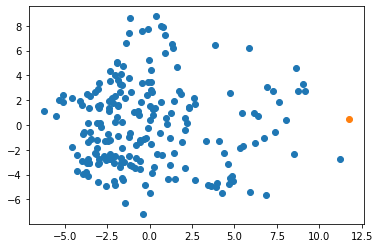

In [16]:
#Single-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='single')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run single-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

classification_accuracy(train_df, y_hc, df2)

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()

In [17]:
#Complete-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='complete')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run complete-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
scaled_features_df['cluster'] = pd.DataFrame(y_hc)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

classification_accuracy(train_df, y_hc, df2)

Time taken to run complete-linkage agglo. clustering (pre-PCA dataset):  0.004955768585205078
Silhouette score is:  0.2397799416863721
Davies Bouldin score is:  2.1071187552620314
Calinski Harabasz score is:  33.4145932722428
Classification accuracy:  0.47596153846153844


Time taken to run complete-linkage agglo. clustering (post-PCA dataset):  0.0029807090759277344
Silhouette score is:  0.44829824351281516
Davies Bouldin score is:  0.933130408085503
Calinski Harabasz score is:  118.55585297173863
Classification accuracy:  0.4567307692307692


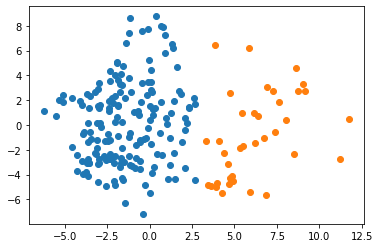

In [18]:
#Complete-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='complete')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run complete-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

classification_accuracy(train_df, y_hc, df2)

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()

In [19]:
#Average-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run average-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

classification_accuracy(train_df, y_hc, df2)

Time taken to run average-linkage agglo. clustering (pre-PCA dataset):  0.003988742828369141
Silhouette score is:  0.374334962741391
Davies Bouldin score is:  0.48390993010392624
Calinski Harabasz score is:  3.913318228639693
Classification accuracy:  0.5288461538461539


Time taken to run average-linkage agglo. clustering (post-PCA dataset):  0.001993894577026367
Silhouette score is:  0.4440378959303122
Davies Bouldin score is:  0.8985170873695689
Calinski Harabasz score is:  115.04512480736163
Classification accuracy:  0.4567307692307692


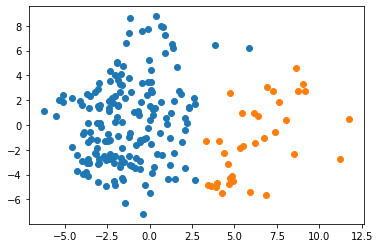

In [20]:
#Average-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run average-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

classification_accuracy(train_df, y_hc, df2)

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()

In [21]:
#Ward-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run ward-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

classification_accuracy(train_df, y_hc, df2)

Time taken to run ward-linkage agglo. clustering (pre-PCA dataset):  0.008976459503173828
Silhouette score is:  0.24824492805815043
Davies Bouldin score is:  2.045454122482272
Calinski Harabasz score is:  33.64335732969204
Classification accuracy:  0.47115384615384615


Time taken to run ward-linkage agglo. clustering (post-PCA dataset):  0.00299072265625
Silhouette score is:  0.44829824351281516
Davies Bouldin score is:  0.933130408085503
Calinski Harabasz score is:  118.55585297173863
Classification accuracy:  0.4567307692307692


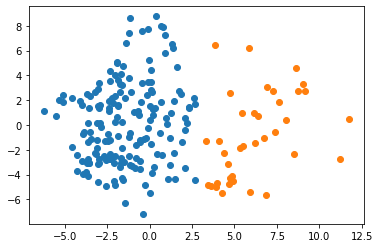

In [22]:
#Ward-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run ward-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

classification_accuracy(train_df, y_hc, df2)

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()